Author: Piotr Kaniewski
# Ground Truth Experiments Report
This report is aiminig at examining and benchmarking the quality of several different ground truth sets. Namely: 
* KGML-xDTD - ground truth coming from KGML-xDTD publication, currently used by our pipeline.
* EC Matrix Indication List - indications and contraindications list concatenated together, prepared by Marcello by scraping FDA regulators webpages.
* EC Matrix Indication List Downfilled  -  same list as above but all diseases get downfilled using MONDO Ontology; i.e. if we Alzheimeer has twenty children in MONDO ontology, we also create twenty pairs based on those children.
* Custom Pair - ground truth extracted from OpenTargets, DrugCentral and PrimeKG.
* KGML-xDTD + EC Matrix Indication List - hybrid list which has concatenated version of KGML-xDTD and original EC Matrix List

These are going to be tested on RTX-KG2 as well as on ROBOKOP using experimental groudn truth pipeline which should ensure no data leakage. 

**TL;DR**
* While EC Downfilled Ground Truth performs well on standard ground truth, it performs very poorly on withheld datasets. Note that good performance on EC Downfilled GT is due to some level of data leakage which occurs due to downfilling.

* Custom Ground Truth (OpenTargets/PrimeKG) performs worse on standard ground truth but better when it comes to withheld datasets. 

* Similar observations can be made on ROBOKOP although EC downfilled does perform better on ROBOKOP for some metrics

* Frequent flyers:
    * Frequent flyer drugs are more common in models trained on EC Downfilled GT, less common for Custom GT 

    * Frequent flyer diseases are more common in models trained on Custom GT but less common for EC Downfilled GT.

* My hypothesis for poor performance of EC Downfilled is due to Downfilling process which creates many unreal indication pairs and emphasises potential noise due to general terms in our non-downfilled ground truth.

* One of the reasons why custom GT performs better is because drugs/diseases which are in the training set are present in off-label/clinical trials dataset so the model is exposed to them w/o leaking actual pair information


**Next step:** decide if we want to continue improving EC GT/pursue independent source for ground truth. Share Matrices with medical team for blinded qualitative assessment



In [1]:
import polars as pl
import yaml as yaml
from PIL import Image
from google.cloud import storage

# Mapping
For reference on how to reproduce the notebook, see `lab-notebooks/gt_experiments_march2025/gt_experiments_main.ipynb`

In [ ]:
nodes = pl.read_parquet('gs://mtrx-us-central1-hub-dev-storage/kedro/data/tests/v0.4.1-rtx-gt-exp/datasets/integration/prm/filtered/nodes/')
robo_nodes = pl.read_parquet('gs://mtrx-us-central1-hub-dev-storage/kedro/data/tests/v0.4.1-robokop-gt-exp/datasets/integration/prm/filtered/nodes/')

In [44]:
kgml_xdtd_gt = pl.read_parquet('gs://mtrx-us-central1-hub-dev-storage/kedro/data/tests/v0.4.1-rtx-gt-exp/runs/rtx-kg2-kgml-xdtd-ae5f082e/datasets/modelling/ground_truth/translator/ground_truth_pairs_raw/')
ec_original_gt = pl.read_parquet('gs://mtrx-us-central1-hub-dev-storage/kedro/data/tests/v0.4.1-rtx-gt-exp/runs/rtx-kg2-ec-original-0a6a4bc9/datasets/modelling/ground_truth/translator/ground_truth_pairs_raw/')
ec_downfilled_gt = pl.read_parquet('gs://mtrx-us-central1-hub-dev-storage/kedro/data/tests/v0.4.1-rtx-gt-exp/runs/rtx-kg2-ec-original-downfilled-79d8dac8/datasets/modelling/ground_truth/translator/ground_truth_pairs_raw/')
custom_gt = pl.read_parquet('gs://mtrx-us-central1-hub-dev-storage/kedro/data/tests/v0.4.1-rtx-gt-exp/runs/rtx-ec-custom-gt-8adbe2d3/datasets/modelling/ground_truth/translator/ground_truth_pairs_raw/')

/var/folders/8k/ct7ltxz14k37shrv70134t1c0000gp/T/ipykernel_10090/1308678379.py:6: DeprecationWarning: `GroupBy.count` is deprecated. It has been renamed to `len`.
  kgml_xdtd_full_in_kg = kgml_xdtd_gt.filter(pl.col('subject').is_in(nodes['id']) & pl.col('object').is_in(nodes['id'])).group_by('y').count()
/var/folders/8k/ct7ltxz14k37shrv70134t1c0000gp/T/ipykernel_10090/1308678379.py:7: DeprecationWarning: `GroupBy.count` is deprecated. It has been renamed to `len`.
  ec_original_full_in_kg = ec_original_gt.filter(pl.col('subject').is_in(nodes['id']) & pl.col('object').is_in(nodes['id'])).group_by('y').count()
/var/folders/8k/ct7ltxz14k37shrv70134t1c0000gp/T/ipykernel_10090/1308678379.py:8: DeprecationWarning: `GroupBy.count` is deprecated. It has been renamed to `len`.
  ec_downfilled_full_in_kg = ec_downfilled_gt.filter(pl.col('subject').is_in(nodes['id']) & pl.col('object').is_in(nodes['id'])).group_by('y').count()
/var/folders/8k/ct7ltxz14k37shrv70134t1c0000gp/T/ipykernel_10090/13086

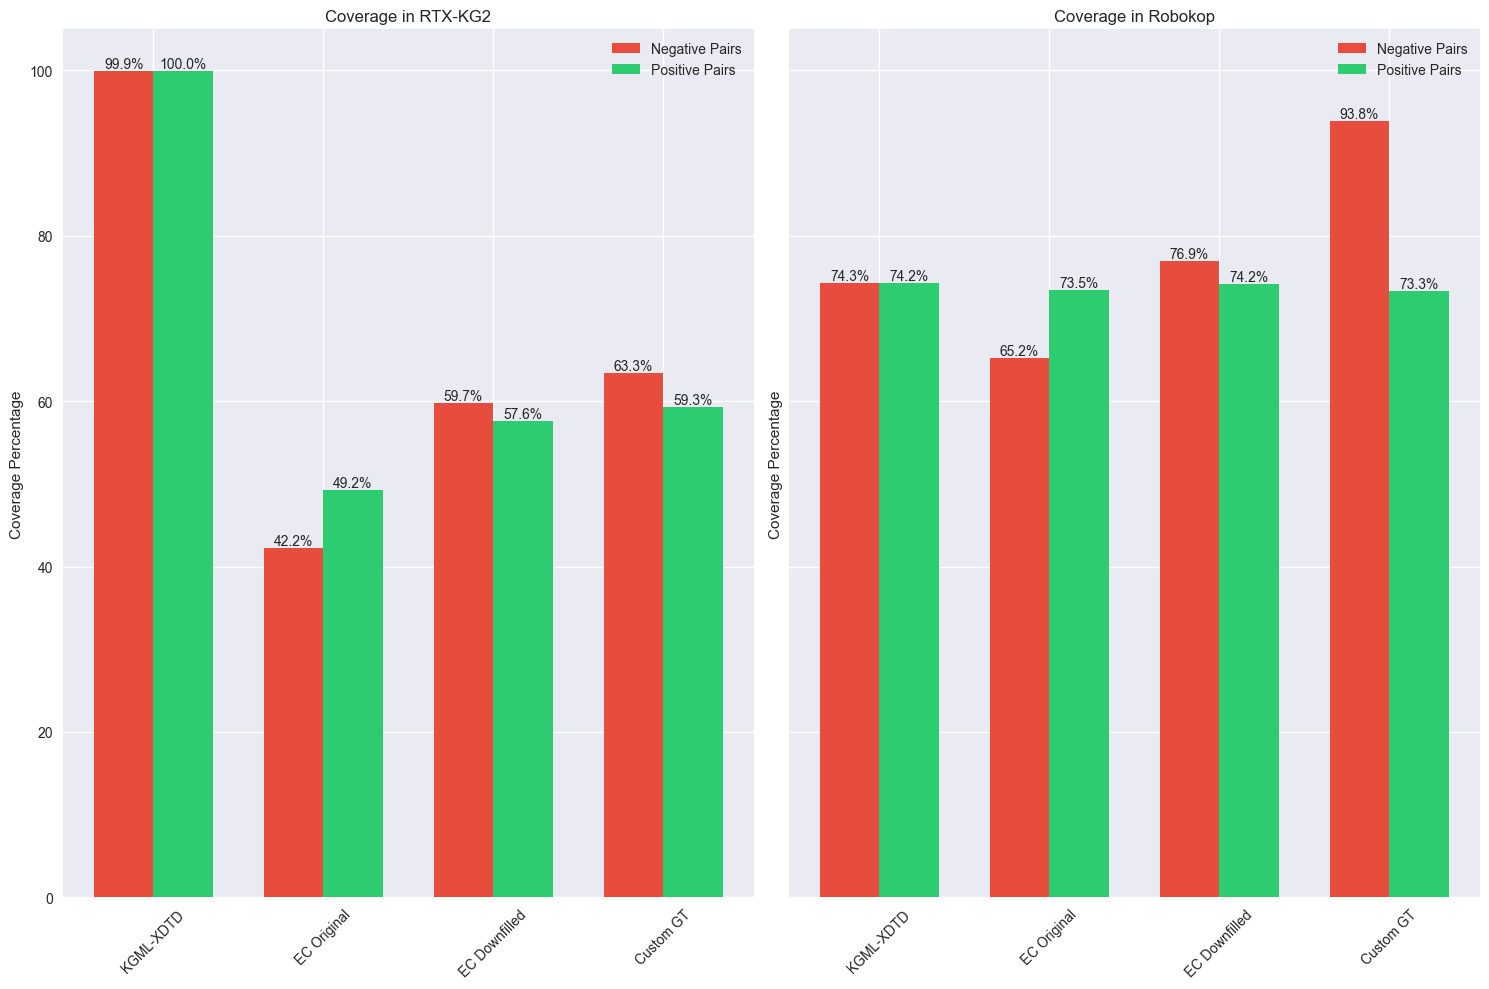

In [132]:
# see original notebook for code

/var/folders/8k/ct7ltxz14k37shrv70134t1c0000gp/T/ipykernel_10090/1505527970.py:6: DeprecationWarning: `GroupBy.count` is deprecated. It has been renamed to `len`.
  kgml_xdtd_full_in_kg = kgml_xdtd_gt.filter(pl.col('subject').is_in(nodes['id']) & pl.col('object').is_in(nodes['id'])).group_by('y').count()
/var/folders/8k/ct7ltxz14k37shrv70134t1c0000gp/T/ipykernel_10090/1505527970.py:7: DeprecationWarning: `GroupBy.count` is deprecated. It has been renamed to `len`.
  ec_original_full_in_kg = ec_original_gt.filter(pl.col('subject').is_in(nodes['id']) & pl.col('object').is_in(nodes['id'])).group_by('y').count()
/var/folders/8k/ct7ltxz14k37shrv70134t1c0000gp/T/ipykernel_10090/1505527970.py:8: DeprecationWarning: `GroupBy.count` is deprecated. It has been renamed to `len`.
  ec_downfilled_full_in_kg = ec_downfilled_gt.filter(pl.col('subject').is_in(nodes['id']) & pl.col('object').is_in(nodes['id'])).group_by('y').count()
/var/folders/8k/ct7ltxz14k37shrv70134t1c0000gp/T/ipykernel_10090/15055

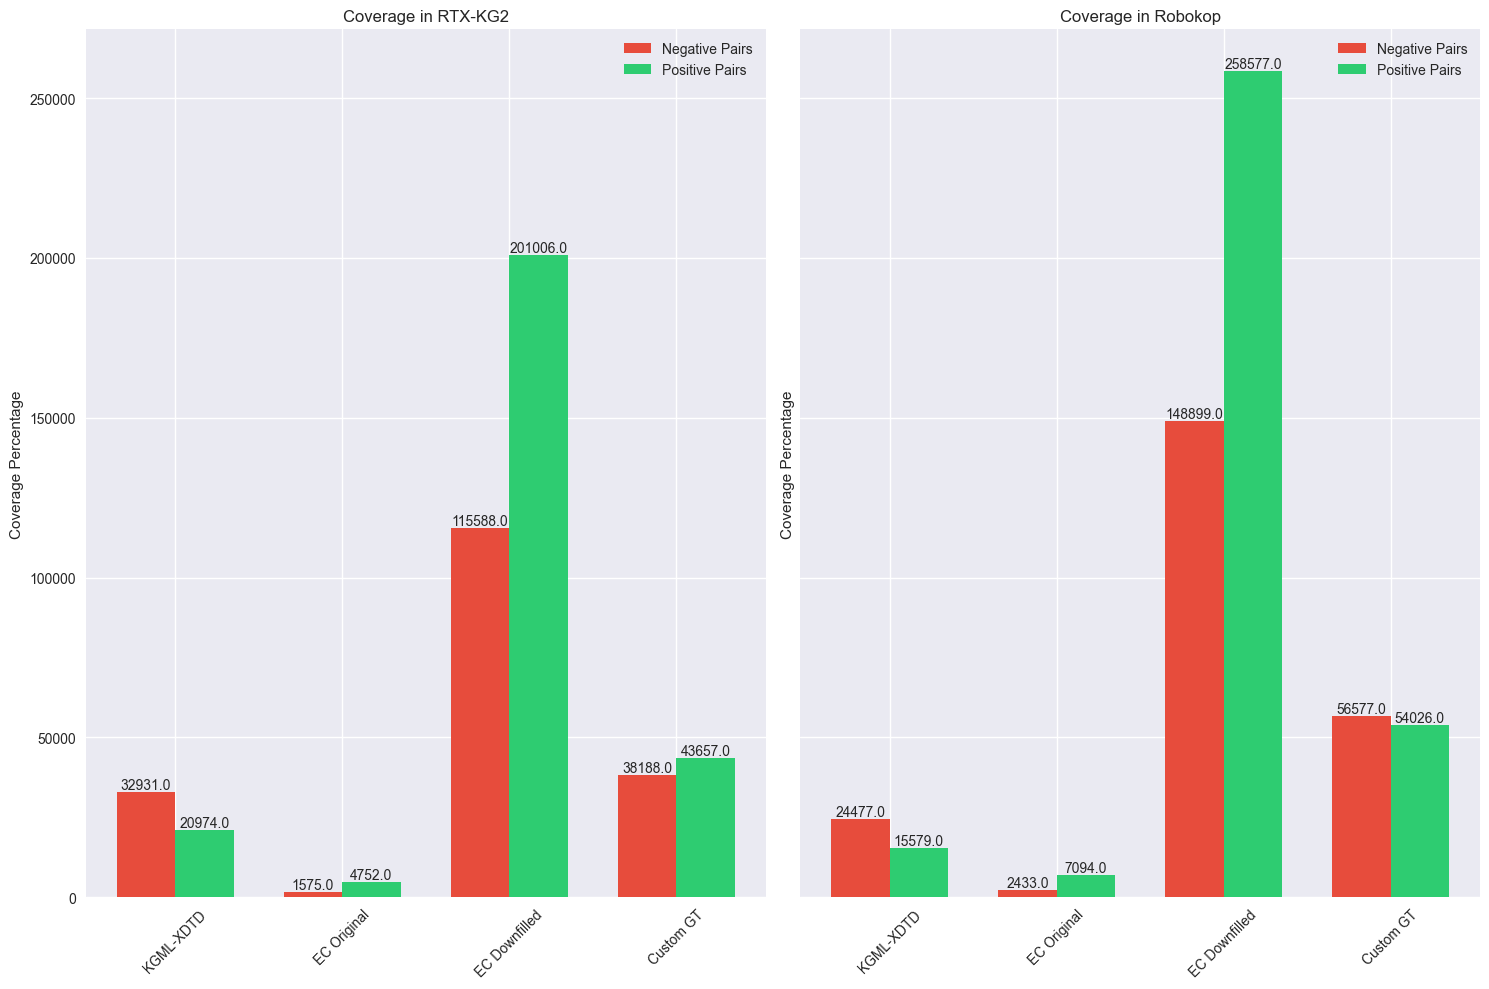

In [133]:
# see original notebook for code

When it comes to numbers, Downfilled version of GT is expectedly the largest, second largest being Custom GT from OpenTargets. When it comes to negative:positive ratio, new ground truth has more indications than contraindications, contrary to KGML-xDTD - in case of Custom GT, it depends on the KG we are mapping to but the trend is pretty much similar

# RTX-KG2 
I will compare the Metrics using evaluation library as well as putting together MLFlow Metrics in a tabular format 

## Tabular Metrics

In [34]:
# for reference on how to reproduce the notebook, see `lab-notebooks/gt_experiments_march2025/gt_experiments_main.ipynb`
import polars as pl
kgml_df = pl.DataFrame(kgml_xdtd_metrics_same_gt)
ec_df = pl.DataFrame(ec_original_metrics_same_gt)
ec_downfilled_df = pl.DataFrame(ec_downfilled_metrics_same_gt)
kgml_ec_df = pl.DataFrame(kgml_ec_metrics_same_gt)
custom_gt_df = pl.DataFrame(custom_gt_metrics_same_gt)


def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: green' if v else '' for v in is_max]

def highlight_min(s):
    is_max = s == s.min()
    return ['background-color: red' if v else '' for v in is_max]


pl.Config.set_tbl_rows(40)
df = pl.concat([kgml_df, ec_df, ec_downfilled_df, kgml_ec_df, custom_gt_df]).transpose(include_header=True, header_name='metric', column_names=['kgml','ec', 'ec_downfilled', 'kgml_ec', 'custom_gt'])
df.to_pandas().set_index('metric').style.apply(highlight_max, axis=1).apply(highlight_min,axis=1)

,kgml,ec,ec_downfilled,kgml_ec,custom_gt
metric,,,,,
auroc,0.990583,0.962423,0.998285,0.985115,0.987108
recall-1000,0.143330,0.053478,0.062026,0.126104,0.108362
recall-10000,0.470013,0.251769,0.506607,0.409659,0.341334
recall-100000,0.795984,0.580599,0.927156,0.724723,0.689971
recall-1000000,0.942957,0.814401,0.992271,0.915241,0.921077
accuracy_score,0.895632,0.606436,0.957667,0.858979,0.805955
f1_score,0.862120,0.695621,0.966492,0.825946,0.873101
hit-10,0.579939,0.336094,0.917498,0.529266,0.327349
hit-100,0.849745,0.660975,0.989112,0.807037,0.719054


From the table we can say that:
* EC downfilled ground truth yields the best results for standard train-test split but worst when it comes to clinical trials data.
* Second best is KGML-xDTD ground truth, which performs well across all metrics
* Custom GT performs best when it comes to clinical trials data; Original EC ground truth also performs fairly well

## Visualisations
Below I will use our evaluation library for comparison of performance between different ground truths

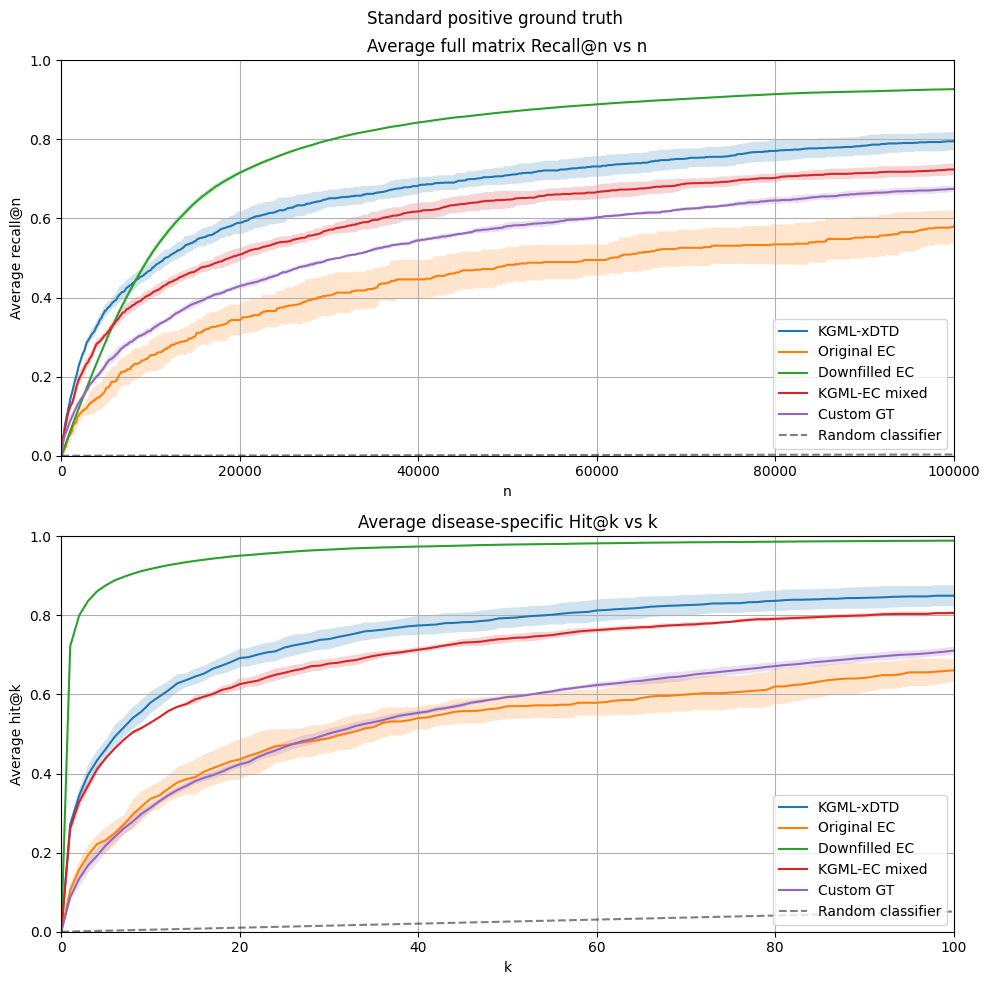

In [14]:
plot_av_ranking_metrics(
    (kgml_xdtd_full, ec_original_full, ec_downfilled_full, kgml_ec_full, custom_gt_full),
    ('KGML-xDTD', 'Original EC', 'Downfilled EC', 'KGML-EC mixed', 'Custom GT'),
    bool_test_col = 'is_known_positive',
    score_col='treat score',
    perform_sort = False,
    sup_title = "Standard positive ground truth",
    is_average_folds = True
)

On the standard train-test split, we have the following ranking:
* Downfilled EC ground truth
* KGML-xDTD ground truth
* Hybrid KGML-xDTD + EC ground dtruh
* Custom GT
* Original EC GT

We need to note that the performance of EC Downfilled ground truth with a random train-test split might result in data leakage as when we are downfilling a drug-Alzheimer's treatment, some drug-Alzheimer children might be in train and otehrs in test - while in fact they should be all in the train split. For this we will need experimental ontology-based split

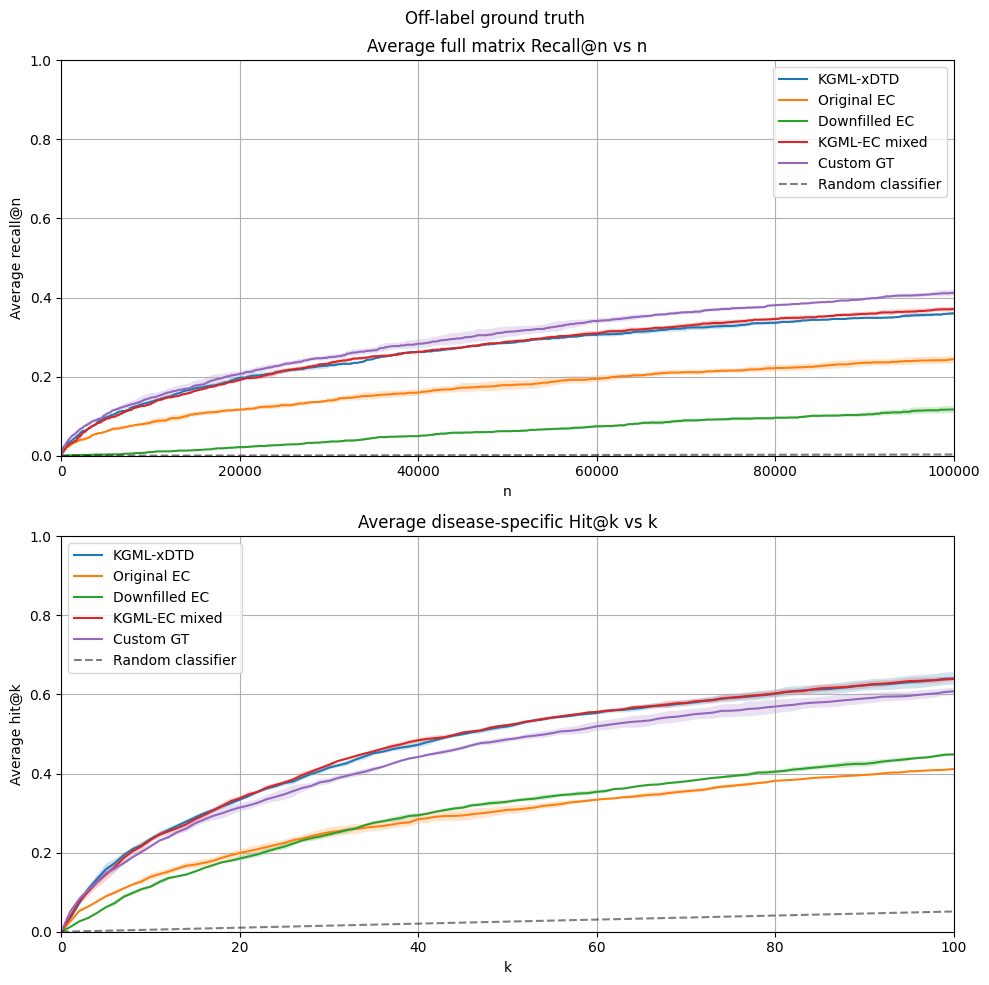

In [15]:
plot_av_ranking_metrics(
    (kgml_xdtd_full, ec_original_full, ec_downfilled_full, kgml_ec_full, custom_gt_full),
    ('KGML-xDTD', 'Original EC', 'Downfilled EC', 'KGML-EC mixed', 'Custom GT'),
    bool_test_col = 'is_off_label',
    score_col='treat score',
    perform_sort = False,
    sup_title = "Off-label ground truth",
    is_average_folds = True
    
)

On the Off-label dataset (so our witheld/unseen dataset), it seems like our Downfilled EC GT is no longer performing best; now the ranking is more along the lines of:

* Custom GT & KGML-xDTD & hybrid KG perform best
* Then original EC GT
* Then Downfilled EC ground truth 

We need to note that although I excluded all off-label pairs from Custom GT, there is a possibility that these come from the same distribution and thus, custom GT performs so well (off-label pairs were extracted from PrimeKG, and custom GT is also coming from PrimeKG)

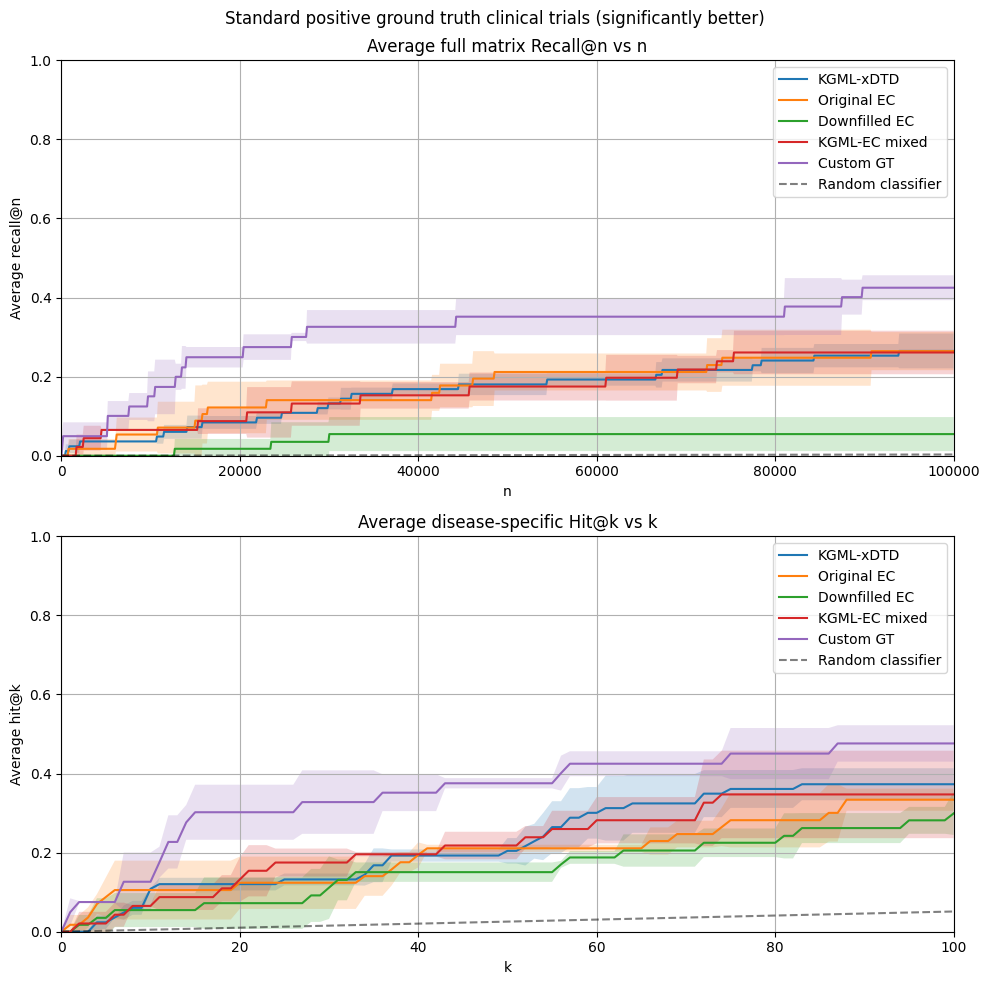

In [16]:
plot_av_ranking_metrics(
    (kgml_xdtd_full, ec_original_full, ec_downfilled_full, kgml_ec_full, custom_gt_full),
    ('KGML-xDTD', 'Original EC', 'Downfilled EC', 'KGML-EC mixed', 'Custom GT'),
    bool_test_col = 'trial_sig_better',
    score_col='treat',
    perform_sort = False,
    sup_title = "Standard positive ground truth clinical trials (significantly better)",
    is_average_folds = True
)

This is a bit concerning; EC Ground Truth in a downfilled format is performing badly on clinical trials prediction whilst in theory it should be based on Indication list and contraindication lists backd by clinical trials. We can argue that custom Ground Truth performs best here because it is possible that EC clinical trials performs so well however why is the EC clinical trials/ Original EC not performing as well as these were supposed be constructed using clinical trials data?

Ranking for clinical Trials:
* Custom GT
* KGML-xDTD, Original EC GT, Hybrid
* Downfilled EC GT

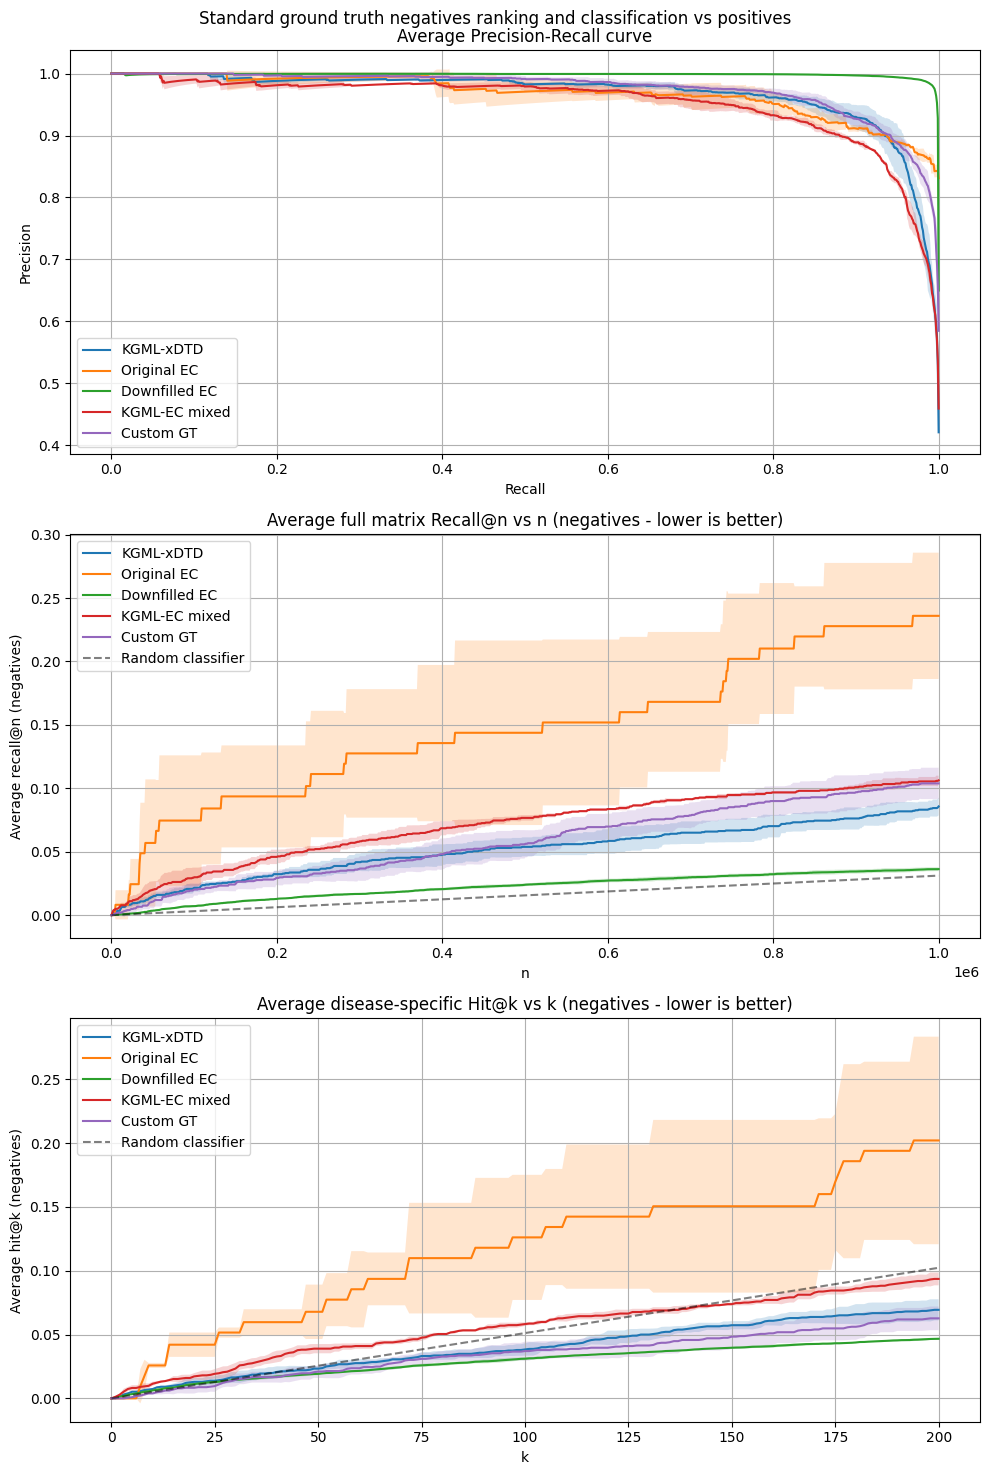

In [20]:
plot_negative_metrics(
    (kgml_xdtd_full, ec_original_full, ec_downfilled_full, kgml_ec_full, custom_gt_full),
    ("KGML-xDTD", "Original EC", "Downfilled EC", "KGML-EC mixed", "Custom GT"),
    bool_pos_col = "is_known_positive",
    bool_neg_col = "is_known_negative",
    score_col = "treat score",
    perform_sort = False,
    sup_title = "Standard ground truth negatives ranking and classification vs positives",
    is_average_folds = True
)

Here again, when looking at standard ground truth split, Downfilled EC GT performs best as it has the lowest negative prediction metrics; however again we need to note that there is likely data leakage when doing random train-test split. We can see that EC Original Ground Truth is performing worst and clearly stands out from the rest but it's also the smallest dataset hence high uncertainty intervals. Custom GT seems to perform best again

Ranking here:
* EC Downfilled
* Custom Ground Truth
* KGML-xDTd
* Hybrid KGML-EC
* EC Original

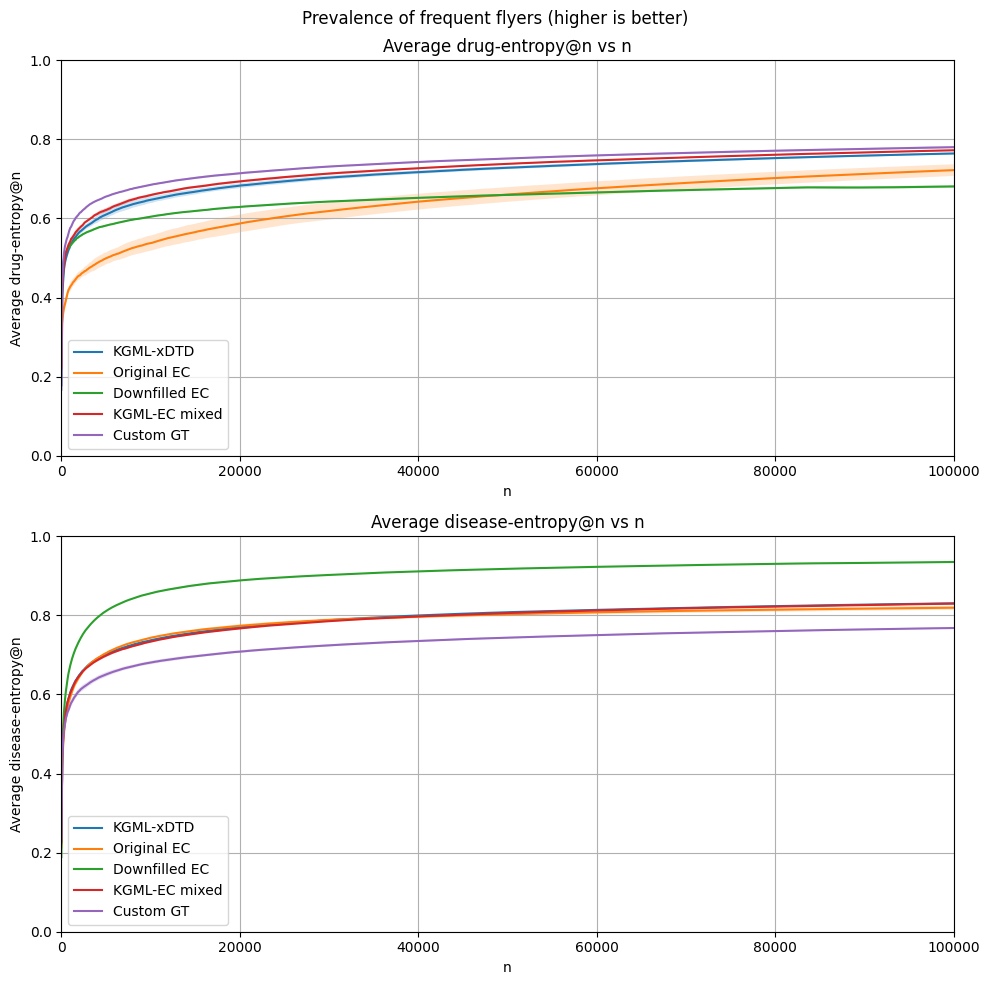

In [21]:
plot_av_entropy(
    (kgml_xdtd_full, ec_original_full, ec_downfilled_full, kgml_ec_full, custom_gt_full),
    ("KGML-xDTD", "Original EC", "Downfilled EC", "KGML-EC mixed", "Custom GT"),
    score_col = "treat score",
    perform_sort = False,
    sup_title = "Prevalence of frequent flyers (higher is better)"
)

When it comes to Drug entropy, the downfilled list and EC Original lists perform the worst. For Downfilled version it's not surprising as we are downfilling all diseases but it is a bit surprising for drugs - might be due to unbalanced list? When it comes to diseases however, the Custom Gt performs worst but Downfilled ground truth performs best - likely thanks to downfilling as it's diversifinyg IDs quite a lot

# ROBOKOP
Same analysis for ROBOKOP

## Tabular Metrics

In [40]:
# for reference on how to reproduce the notebook, see `lab-notebooks/gt_experiments_march2025/gt_experiments_main.ipynb`
import polars as pl
kgml_df = pl.DataFrame(kgml_xdtd_metrics_same_gt)
ec_df = pl.DataFrame(ec_original_metrics_same_gt)
ec_downfilled_df = pl.DataFrame(ec_downfilled_metrics_same_gt)
kgml_ec_df = pl.DataFrame(kgml_ec_metrics_same_gt)
custom_gt_df = pl.DataFrame(custom_gt_metrics_same_gt)


def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: green' if v else '' for v in is_max]

def highlight_min(s):
    is_max = s == s.min()
    return ['background-color: red' if v else '' for v in is_max]


pl.Config.set_tbl_rows(40)
df = pl.concat([kgml_df, ec_df, ec_downfilled_df, kgml_ec_df, custom_gt_df]).transpose(include_header=True, header_name='metric', column_names=['kgml','ec', 'ec_downfilled', 'kgml_ec', 'custom_gt'])
df.to_pandas().set_index('metric').style.apply(highlight_max, axis=1).apply(highlight_min,axis=1)

,kgml,ec,ec_downfilled,kgml_ec,custom_gt
metric,,,,,
auroc,0.983129,0.965509,0.996459,0.985115,0.985998
recall-1000,0.075009,0.118011,0.020048,0.126104,0.069117
recall-10000,0.337091,0.317506,0.187487,0.409659,0.269843
recall-100000,0.652187,0.576725,0.806186,0.724723,0.624238
recall-1000000,0.875654,0.789970,0.977419,0.915241,0.897371
accuracy_score,0.836495,0.585133,0.932878,0.858979,0.822113
f1_score,0.769836,0.664107,0.945575,0.825946,0.816400
hit-10,0.440141,0.313231,0.806862,0.529266,0.251882
hit-100,0.742003,0.617266,0.971099,0.807037,0.638233


## Visualisation Metrics


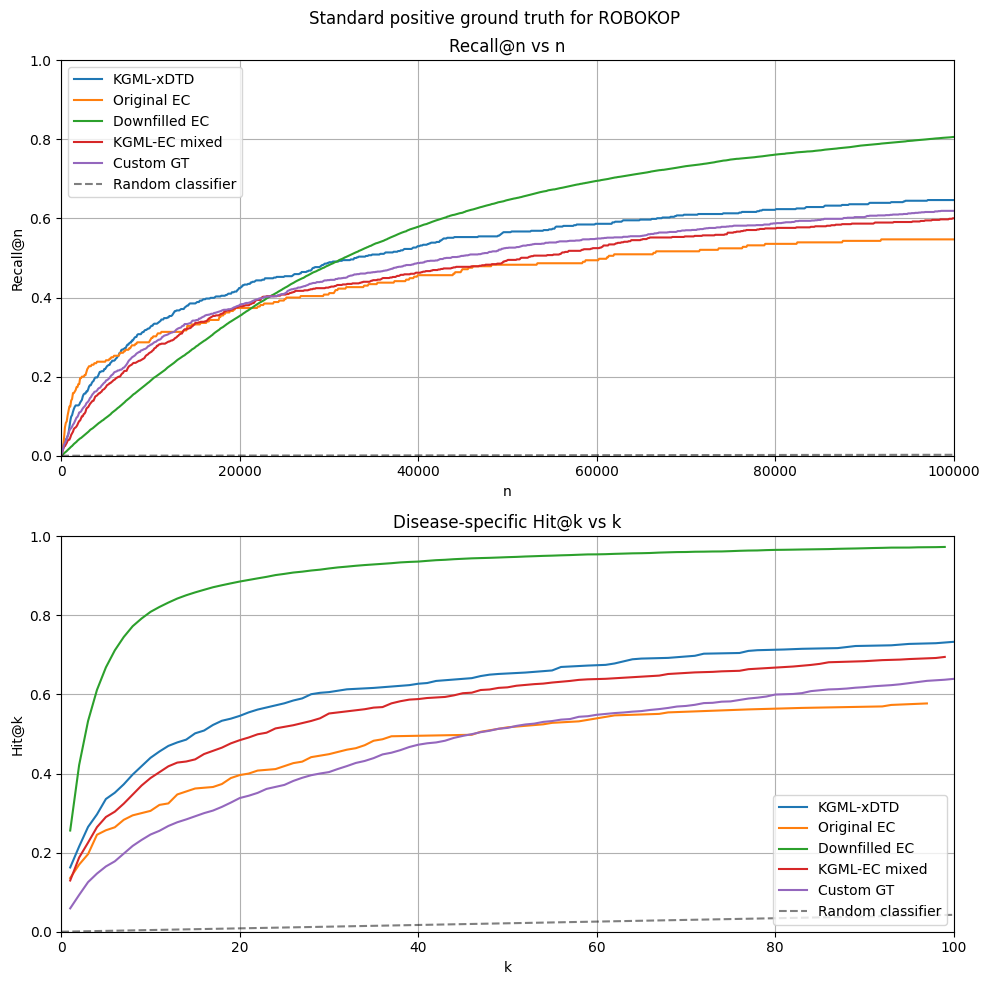

In [15]:
plot_av_ranking_metrics(
    (robo_kgml_xdtd_full[0], robo_ec_original_full[0], robo_ec_downfilled_full[0], robo_kgml_ec_full[0], robo_custom_full[0]),
    ('KGML-xDTD', 'Original EC', 'Downfilled EC', 'KGML-EC mixed', 'Custom GT' ),
    bool_test_col = 'is_known_positive',
    score_col='treat score',
    perform_sort = False,
    sup_title = "Standard positive ground truth for ROBOKOP",
    is_average_folds = False #True
    
)

Same pattern as in case of RTX-KG2, Downfilled EC GT is performing best, KGML coming second best then hybrid, custom and Original EC GT

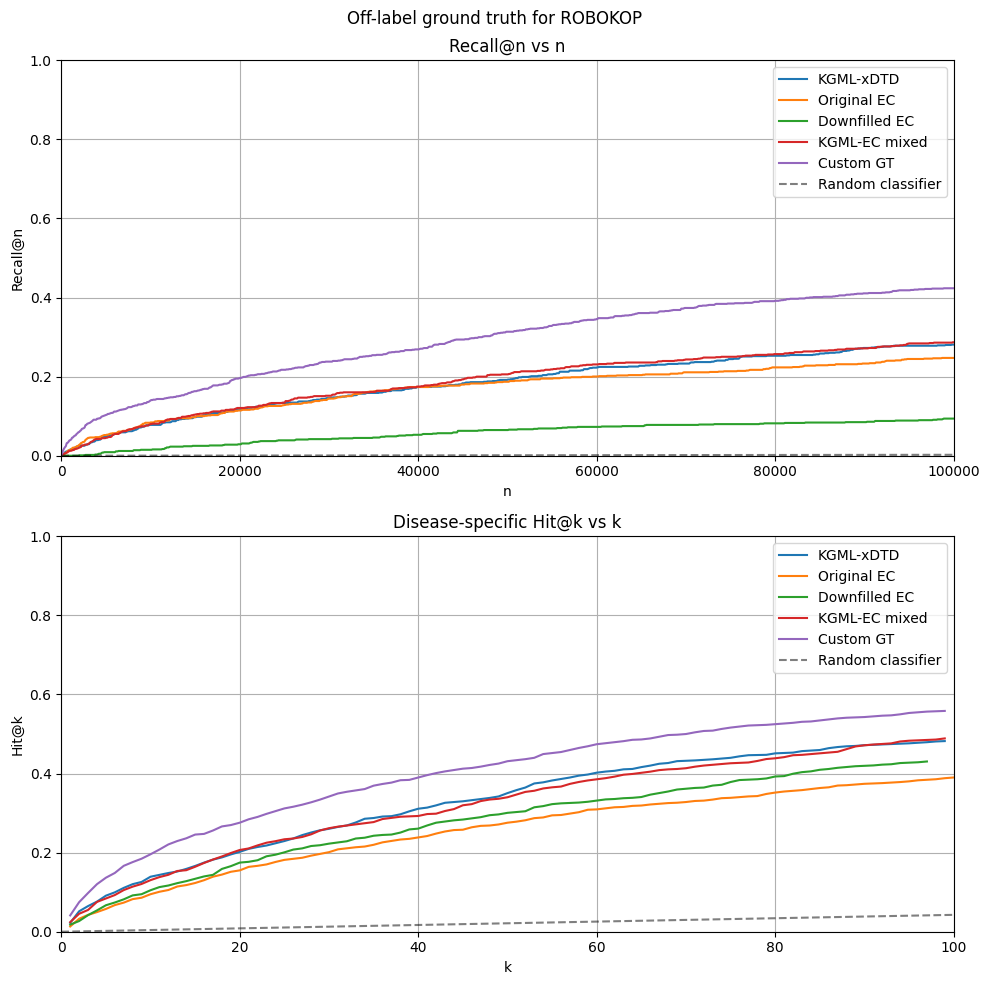

In [16]:
plot_av_ranking_metrics(
    (robo_kgml_xdtd_full[0], robo_ec_original_full[0], robo_ec_downfilled_full[0], robo_kgml_ec_full[0], robo_custom_full[0]),
    ('KGML-xDTD', 'Original EC', 'Downfilled EC', 'KGML-EC mixed', 'Custom GT'),
    bool_test_col = 'is_off_label',
    score_col='treat score',
    perform_sort = False,
    sup_title = "Off-label ground truth for ROBOKOP",
    is_average_folds = False #True
    
)

Same pattern here although Custom GT here performs much better than remaining ground truth sets

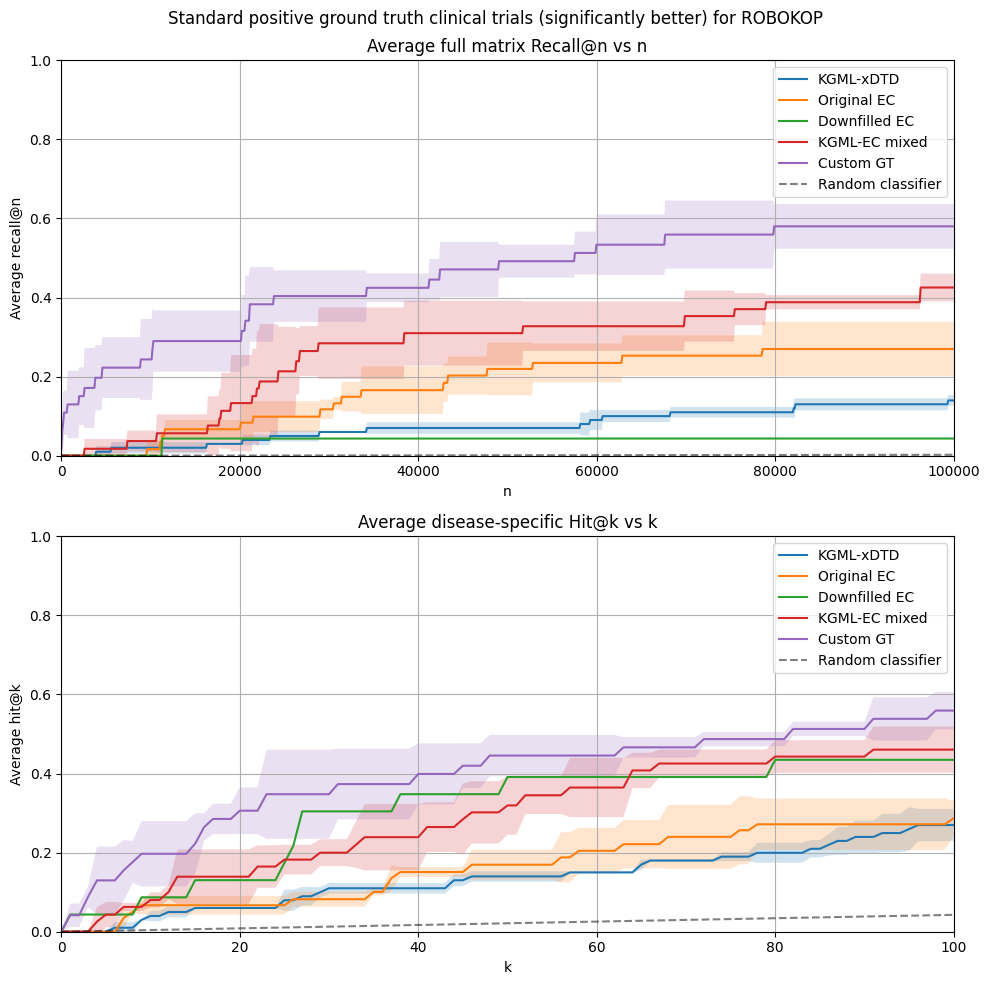

In [17]:
plot_av_ranking_metrics(
    (robo_kgml_xdtd_full, robo_ec_original_full, robo_ec_downfilled_full, robo_kgml_ec_full, robo_custom_full),
    ('KGML-xDTD', 'Original EC', 'Downfilled EC', 'KGML-EC mixed', 'Custom GT'),
    bool_test_col = 'trial_sig_better',
    score_col='treat score',
    perform_sort = False,
    sup_title = "Standard positive ground truth clinical trials (significantly better) for ROBOKOP",
    is_average_folds = True
)

That's interesting: when training the classifiers on ROBOKOOP, both down-filled EC ground truth and KGML-xDTD perform fairly badly (although Downfilled version performs well on disease-specific metrics). However hen looking at disease specific metrics, now Downfilled version seem to do well. 

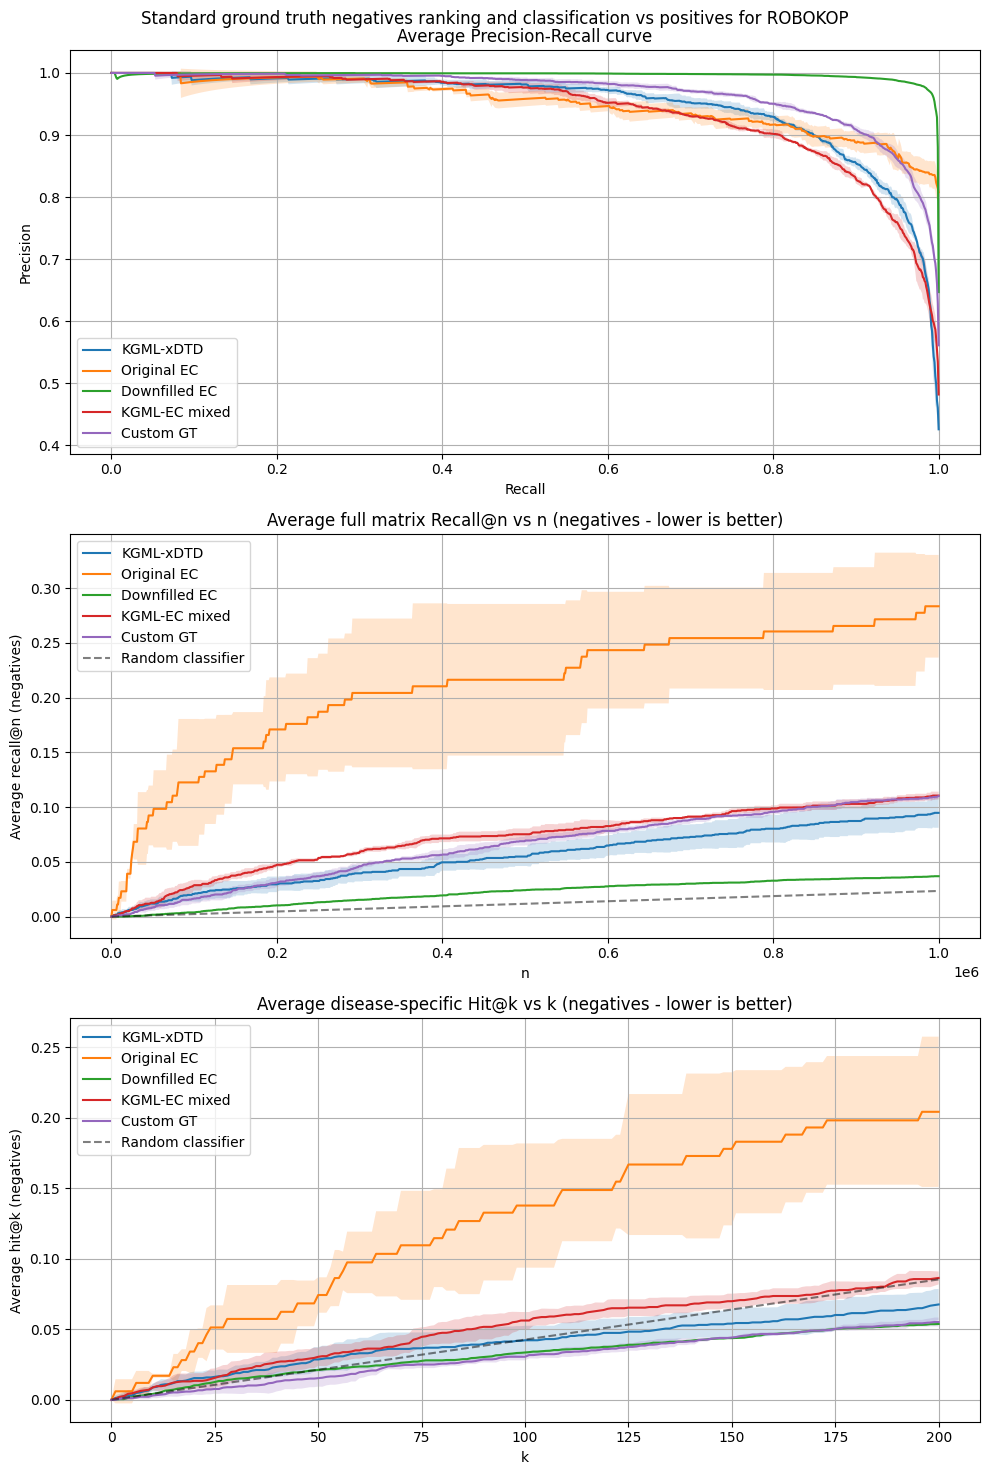

In [19]:
plot_negative_metrics(
    (robo_kgml_xdtd_full, robo_ec_original_full, robo_ec_downfilled_full, robo_kgml_ec_full, robo_custom_full),
    ("KGML-xDTD", "Original EC", "Downfilled EC", "KGML-EC mixed", "Custom GT"),
    bool_pos_col = "is_known_positive",
    bool_neg_col = "is_known_negative",
    score_col = "treat score",
    perform_sort = False,
    sup_title = "Standard ground truth negatives ranking and classification vs positives for ROBOKOP",
    is_average_folds = True
)

Same pattern, downfilled EC Ground truth is now performing best, original is performing worst

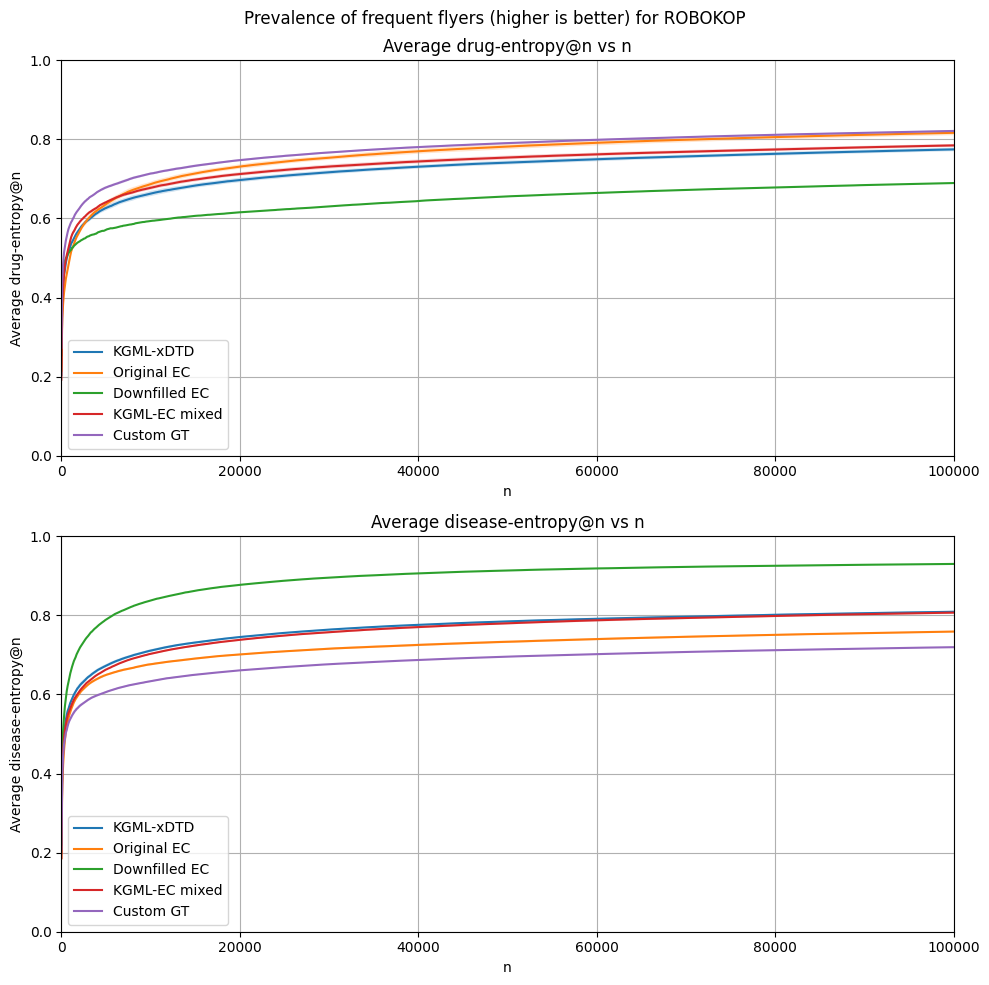

In [20]:
plot_av_entropy(
    (robo_kgml_xdtd_full, robo_ec_original_full, robo_ec_downfilled_full, robo_kgml_ec_full, robo_custom_full),
    ("KGML-xDTD", "Original EC", "Downfilled EC", "KGML-EC mixed", "Custom GT"),
    score_col = "treat score",
    perform_sort = False,
    sup_title = "Prevalence of frequent flyers (higher is better) for ROBOKOP"
)

Same pattern as Last Time; EC downfilled has best entropy when it comes to diseases but worst entropy when it comes to drugs. Custom GT follows the contrary pattern

# Why the discrepancy between KGs
Lets check the uniqueness of drugs and diseases within each GT

In [4]:
import polars as pl 

kgml_xdtd_gt = pl.read_parquet('gs://mtrx-us-central1-hub-dev-storage/kedro/data/tests/v0.4.1-rtx-gt-exp/runs/rtx-kg2-kgml-xdtd-ae5f082e/datasets/modelling/ground_truth/translator/ground_truth_pairs_raw/')
ec_original_gt = pl.read_parquet('gs://mtrx-us-central1-hub-dev-storage/kedro/data/tests/v0.4.1-rtx-gt-exp/runs/rtx-kg2-ec-original-0a6a4bc9/datasets/modelling/ground_truth/translator/ground_truth_pairs_raw/')
ec_downfilled_gt = pl.read_parquet('gs://mtrx-us-central1-hub-dev-storage/kedro/data/tests/v0.4.1-rtx-gt-exp/runs/rtx-kg2-ec-original-downfilled-79d8dac8/datasets/modelling/ground_truth/translator/ground_truth_pairs_raw/')
custom_gt = pl.read_parquet('gs://mtrx-us-central1-hub-dev-storage/kedro/data/tests/v0.4.1-rtx-gt-exp/runs/rtx-ec-custom-gt-8adbe2d3/datasets/modelling/ground_truth/translator/ground_truth_pairs_raw/')

print('Number of unique drugs in KGML-xDTD GT:', len(kgml_xdtd_gt['subject'].unique()))
print('Number of unique diseases in KGML-xDTD GT:', len(kgml_xdtd_gt['object'].unique()))
print('Number of unique drugs in EC Original GT:', len(ec_original_gt['subject'].unique()))
print('Number of unique diseases in EC Original GT:', len(ec_original_gt['object'].unique()))
print('Number of unique drugs in EC Downfilled GT:', len(ec_downfilled_gt['subject'].unique()))
print('Number of unique diseases in EC Downfilled GT:', len(ec_downfilled_gt['object'].unique()))
print('Number of unique drugs in Custom GT:', len(custom_gt['subject'].unique()))
print('Number of unique diseases in Custom GT:', len(custom_gt['object'].unique()))


Number of unique drugs in KGML-xDTD GT: 3014
Number of unique diseases in KGML-xDTD GT: 3547
Number of unique drugs in EC Original GT: 2675
Number of unique diseases in EC Original GT: 2792
Number of unique drugs in EC Downfilled GT: 2675
Number of unique diseases in EC Downfilled GT: 18555
Number of unique drugs in Custom GT: 11547
Number of unique diseases in Custom GT: 5776


## Check overlap with testing datasets

### Off-Label Check

In [112]:
# Create a list to store results
results = []

# KGML-xDTD
present_in_gt = off_label_edges_for_join.filter(pl.col('id').is_in(kgml_xdtd_gt['id'])).height
results.append({
    'dataset': 'KGML-xDTD GT',
    'present_pairs': present_in_gt,
    'proportion_of_offlabel': present_in_gt/off_label_edges_for_join.height,
    'proportion_of_dataset': present_in_gt/kgml_xdtd_gt.height
})

# EC Original
present_in_gt = off_label_edges_for_join.filter(pl.col('id').is_in(ec_original_gt['id'])).height
results.append({
    'dataset': 'EC Original GT', 
    'present_pairs': present_in_gt,
    'proportion_of_offlabel': present_in_gt/off_label_edges_for_join.height,
    'proportion_of_dataset': present_in_gt/ec_original_gt.height
})

# EC Downfilled
present_in_gt = off_label_edges_for_join.filter(pl.col('id').is_in(ec_downfilled_gt['id'])).height
results.append({
    'dataset': 'EC Downfilled GT',
    'present_pairs': present_in_gt, 
    'proportion_of_offlabel': present_in_gt/off_label_edges_for_join.height,
    'proportion_of_dataset': present_in_gt/ec_downfilled_gt.height
})

# EC Custom
present_in_gt = off_label_edges_for_join.filter(pl.col('source').is_in(ec_downfilled_gt['id'])).height
results.append({
    'dataset': 'Custom GT',
    'present_pairs': present_in_gt,
    'proportion_of_offlabel': present_in_gt/off_label_edges_for_join.height, 
    'proportion_of_dataset': present_in_gt/custom_gt.height
})

# Create and display table
results_df = pl.DataFrame(results)
display(results_df)


dataset,present_pairs,proportion_of_offlabel,proportion_of_dataset
str,i64,f64,f64
"""KGML-xDTD GT""",198,0.04502,0.003671
"""EC Original GT""",80,0.01819,0.005976
"""EC Downfilled GT""",362,0.08231,0.000668
"""Custom GT""",0,0.0,0.0


We can see that there is some leakage in each of the datasets, potentially undermining off-label test set. Off-label dataset was excluded on purpose from custom GT as I was aware of the presence. We can see the overlap for EC Downfilled is much greater than for EC Original GT meaning that downfilling process is capturing new approved pairs

### Off-label drug and disease overlap

In [123]:
off_label_edges_for_join = off_label_edges_for_join.rename({'source': 'subject', 'target': 'object'})
# Create a list to store results
results = []

# KGML-xDTD
present_in_gt = off_label_edges_for_join.filter(pl.col('subject').is_in(kgml_xdtd_gt['subject'])).height
results.append({
    'dataset': 'KGML-xDTD GT',
    'present_pairs': present_in_gt,
    'proportion_of_clinical_trials': present_in_gt/len(gt['subject'].unique()),
    'proportion_of_dataset': present_in_gt/len(kgml_xdtd_gt['subject'].unique())
})

# EC Original
present_in_gt = off_label_edges_for_join.filter(pl.col('subject').is_in(ec_original_gt['subject'])).height
results.append({
    'dataset': 'EC Original GT', 
    'present_pairs': present_in_gt,
    'proportion_of_clinical_trials': present_in_gt/len(gt['subject'].unique()),
    'proportion_of_dataset': present_in_gt/len(ec_original_gt['subject'].unique())
})

# EC Downfilled
present_in_gt = off_label_edges_for_join.filter(pl.col('subject').is_in(ec_downfilled_gt['subject']) ).height
results.append({
    'dataset': 'EC Downfilled GT',
    'present_pairs': present_in_gt,
    'proportion_of_clinical_trials': present_in_gt/len(gt['subject'].unique()),
    'proportion_of_dataset': present_in_gt/len(ec_downfilled_gt['subject'].unique())
})

# Custom GT
present_in_gt = off_label_edges_for_join.filter(pl.col('subject').is_in(custom_gt['subject']) ).height
results.append({
    'dataset': 'Custom GT',
    'present_pairs': present_in_gt,
    'proportion_of_clinical_trials': present_in_gt/len(gt['subject'].unique()),
    'proportion_of_dataset': present_in_gt/len(custom_gt['subject'].unique())
})

# Convert to polars DataFrame and display
pl.DataFrame(results).with_columns([
    pl.col('proportion_of_clinical_trials').round(4),
    pl.col('proportion_of_dataset').round(4)
])

dataset,present_pairs,proportion_of_clinical_trials,proportion_of_dataset
str,i64,f64,f64
"""KGML-xDTD GT""",1407,7.6467,0.4668
"""EC Original GT""",1607,8.7337,0.6007
"""EC Downfilled GT""",1607,8.7337,0.6007
"""Custom GT""",4158,22.5978,0.3601


In [125]:

# Create a list to store results
results = []

# KGML-xDTD
present_in_gt = off_label_edges_for_join.filter(pl.col('object').is_in(kgml_xdtd_gt['object'])).height
results.append({
    'dataset': 'KGML-xDTD GT',
    'present_pairs': present_in_gt,
    'proportion_of_clinical_trials': present_in_gt/len(gt['object'].unique()),
    'proportion_of_dataset': present_in_gt/len(kgml_xdtd_gt['object'].unique())
})

# EC Original
present_in_gt = off_label_edges_for_join.filter(pl.col('object').is_in(ec_original_gt['object'])).height
results.append({
    'dataset': 'EC Original GT', 
    'present_pairs': present_in_gt,
    'proportion_of_clinical_trials': present_in_gt/len(gt['object'].unique()),
    'proportion_of_dataset': present_in_gt/len(ec_original_gt['object'].unique())
})

# EC Downfilled
present_in_gt = off_label_edges_for_join.filter(pl.col('object').is_in(ec_downfilled_gt['object']) ).height
results.append({
    'dataset': 'EC Downfilled GT',
    'present_pairs': present_in_gt,
    'proportion_of_clinical_trials': present_in_gt/len(gt['object'].unique()),
    'proportion_of_dataset': present_in_gt/len(ec_downfilled_gt['object'].unique())
})

# Custom GT
present_in_gt = off_label_edges_for_join.filter(pl.col('object').is_in(custom_gt['object']) ).height
results.append({
    'dataset': 'Custom GT',
    'present_pairs': present_in_gt,
    'proportion_of_clinical_trials': present_in_gt/len(gt['object'].unique()),
    'proportion_of_dataset': present_in_gt/len(custom_gt['object'].unique())
})

# Convert to polars DataFrame and display
pl.DataFrame(results).with_columns([
    pl.col('proportion_of_clinical_trials').round(4),
    pl.col('proportion_of_dataset').round(4)
])

dataset,present_pairs,proportion_of_clinical_trials,proportion_of_dataset
str,i64,f64,f64
"""KGML-xDTD GT""",1417,9.9091,0.3995
"""EC Original GT""",1298,9.0769,0.4649
"""EC Downfilled GT""",2100,14.6853,0.1132
"""Custom GT""",4260,29.7902,0.7375


Aha, so even though the pairs themselves were excluded, the drugs and diseases which make up Custom GT are in the off-label set, it's just not specific pairs. This shows that exposing the drugs/diseases in training might actually improve the performance on unseen datasets which also involve these drugs and diseases. This prompts for further experimentation with different splits strategy as it might improve the quality of MATRIX we produce.

However it is a bit strange that EC Downfilled dataset is the second dataset with highest proportion, yet it didn't perform well on this off-label dataset - this coudl be due to 'noisyness' of this set

### Clinical Trials Data Pairs Overlap

In [100]:
gt = pl.read_parquet('gs://mtrx-us-central1-hub-dev-storage/kedro/data/tests/v0.4.1-robokop-gt-exp/datasets/ground_truth/prm/unified/edges/')
gt = gt.filter(pl.col('upstream_source')=='ec_clinical_trial')
gt = gt.with_columns(
    pl.concat_str(['subject', 'object'], separator='|').alias('id')
)

In [111]:

# Create a list to store results
results = []

# KGML-xDTD
present_in_gt = gt.filter(pl.col('id').is_in(kgml_xdtd_gt['id'])).height
results.append({
    'dataset': 'KGML-xDTD GT',
    'present_pairs': present_in_gt,
    'proportion_of_clinical_trials': present_in_gt/gt.height,
    'proportion_of_dataset': present_in_gt/kgml_xdtd_gt.height
})

# EC Original
present_in_gt = gt.filter(pl.col('id').is_in(ec_original_gt['id'])).height
results.append({
    'dataset': 'EC Original GT', 
    'present_pairs': present_in_gt,
    'proportion_of_clinical_trials': present_in_gt/gt.height,
    'proportion_of_dataset': present_in_gt/ec_original_gt.height
})

# EC Downfilled
present_in_gt = gt.filter(pl.col('id').is_in(ec_downfilled_gt['id'])).height
results.append({
    'dataset': 'EC Downfilled GT',
    'present_pairs': present_in_gt,
    'proportion_of_clinical_trials': present_in_gt/gt.height,
    'proportion_of_dataset': present_in_gt/ec_downfilled_gt.height
})

# Custom GT
present_in_gt = gt.filter(pl.col('id').is_in(custom_gt['id'])).height
results.append({
    'dataset': 'Custom GT',
    'present_pairs': present_in_gt,
    'proportion_of_clinical_trials': present_in_gt/gt.height,
    'proportion_of_dataset': present_in_gt/custom_gt.height
})

# Convert to polars DataFrame and display
pl.DataFrame(results).with_columns([
    pl.col('proportion_of_clinical_trials').round(4),
    pl.col('proportion_of_dataset').round(4)
])

dataset,present_pairs,proportion_of_clinical_trials,proportion_of_dataset
str,i64,f64,f64
"""KGML-xDTD GT""",28,0.1233,0.0005
"""EC Original GT""",52,0.2291,0.0039
"""EC Downfilled GT""",65,0.2863,0.0001
"""Custom GT""",119,0.5242,0.0009


##  Clinical Trials datasets - drugs and diseases overlap

In [119]:

# Create a list to store results
results = []

# KGML-xDTD
present_in_gt = gt.filter(pl.col('subject').is_in(kgml_xdtd_gt['subject'])).height
results.append({
    'dataset': 'KGML-xDTD GT',
    'present_pairs': present_in_gt,
    'proportion_of_clinical_trials': present_in_gt/len(gt['subject'].unique()),
    'proportion_of_dataset': present_in_gt/len(kgml_xdtd_gt['subject'].unique())
})

# EC Original
present_in_gt = gt.filter(pl.col('subject').is_in(ec_original_gt['subject'])).height
results.append({
    'dataset': 'EC Original GT', 
    'present_pairs': present_in_gt,
    'proportion_of_clinical_trials': present_in_gt/len(gt['subject'].unique()),
    'proportion_of_dataset': present_in_gt/len(ec_original_gt['subject'].unique())
})

# EC Downfilled
present_in_gt = gt.filter(pl.col('subject').is_in(ec_downfilled_gt['subject']) ).height
results.append({
    'dataset': 'EC Downfilled GT',
    'present_pairs': present_in_gt,
    'proportion_of_clinical_trials': present_in_gt/len(gt['subject'].unique()),
    'proportion_of_dataset': present_in_gt/len(ec_downfilled_gt['subject'].unique())
})

# Custom GT
present_in_gt = gt.filter(pl.col('subject').is_in(custom_gt['subject']) ).height
results.append({
    'dataset': 'Custom GT',
    'present_pairs': present_in_gt,
    'proportion_of_clinical_trials': present_in_gt/len(gt['subject'].unique()),
    'proportion_of_dataset': present_in_gt/len(custom_gt['subject'].unique())
})

# Convert to polars DataFrame and display
pl.DataFrame(results).with_columns([
    pl.col('proportion_of_clinical_trials').round(4),
    pl.col('proportion_of_dataset').round(4)
])

dataset,present_pairs,proportion_of_clinical_trials,proportion_of_dataset
str,i64,f64,f64
"""KGML-xDTD GT""",117,0.6359,0.0388
"""EC Original GT""",155,0.8424,0.0579
"""EC Downfilled GT""",155,0.8424,0.0579
"""Custom GT""",191,1.038,0.0165


In [120]:

# Create a list to store results
results = []

# KGML-xDTD
present_in_gt = gt.filter( pl.col('object').is_in(kgml_xdtd_gt['object'])).height
results.append({
    'dataset': 'KGML-xDTD GT',
    'present_pairs': present_in_gt,
    'proportion_of_clinical_trials': present_in_gt/len(gt['object'].unique()),
    'proportion_of_dataset': present_in_gt/len(kgml_xdtd_gt['object'].unique())
})

# EC Original
present_in_gt = gt.filter(pl.col('object').is_in(ec_original_gt['object'])).height
results.append({
    'dataset': 'EC Original GT', 
    'present_pairs': present_in_gt,
    'proportion_of_clinical_trials': present_in_gt/len(gt['object'].unique()),
    'proportion_of_dataset': present_in_gt/len(ec_original_gt['object'].unique())
})

# EC Downfilled
present_in_gt = gt.filter(pl.col('object').is_in(ec_downfilled_gt['object'])).height
results.append({
    'dataset': 'EC Downfilled GT',
    'present_drugs': present_in_gt,
    'proportion_of_clinical_trials': present_in_gt/len(gt['object'].unique()),
    'proportion_of_dataset': present_in_gt/len(ec_downfilled_gt['object'].unique())
})

# Custom GT
present_in_gt = gt.filter(pl.col('object').is_in(custom_gt['object'])).height
results.append({
    'dataset': 'Custom GT',
    'present_pairs': present_in_gt,
    'proportion_of_clinical_trials': present_in_gt/len(gt['object'].unique()),
    'proportion_of_dataset': present_in_gt/len(custom_gt['object'].unique())
})

# Convert to polars DataFrame and display
pl.DataFrame(results).with_columns([
    pl.col('proportion_of_clinical_trials').round(4),
    pl.col('proportion_of_dataset').round(4)
])

dataset,present_pairs,proportion_of_clinical_trials,proportion_of_dataset
str,i64,f64,f64
"""KGML-xDTD GT""",183,1.2797,0.0516
"""EC Original GT""",190,1.3287,0.0681
"""EC Downfilled GT""",212,1.4825,0.0114
"""Custom GT""",198,1.3846,0.0343


There is also a large overlap when it comes to Clinical Trials data for each of these datasets. This is not great news for our evaluation pipeline as it's making the clinical trials set and all other datasets not fully withheld.

# Quick Exploratory/Quality Check of the new Ground Truth
Below I will explore EC ground truth downfilled version to identify what could be the cause of lower performance for this dataset. 


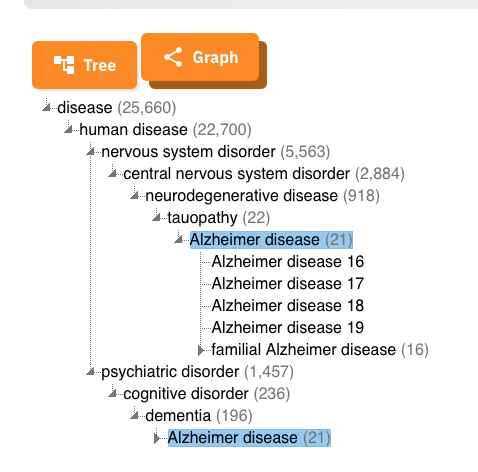

In [1]:
from PIL import Image

Image.open('/Users/piotrkaniewski/Downloads/mondo_downfill.png')

In [14]:
# Load mondo ontology dictionary which I obtained when preparing downfilled splitter
import pickle

with open('/Users/piotrkaniewski/work/matrix/pipelines/matrix/scratch/mondo_dict.pkl', 'rb') as f:
    mondo_dict = pickle.load(f)

In [16]:
import polars as pl 
kgml_xdtd_gt = pl.read_parquet('gs://mtrx-us-central1-hub-dev-storage/kedro/data/tests/v0.4.1-rtx-gt-exp/runs/rtx-kg2-kgml-xdtd-ae5f082e/datasets/modelling/ground_truth/translator/ground_truth_pairs_raw/')
ec_original_gt = pl.read_parquet('gs://mtrx-us-central1-hub-dev-storage/kedro/data/tests/v0.4.1-rtx-gt-exp/runs/rtx-kg2-ec-original-0a6a4bc9/datasets/modelling/ground_truth/translator/ground_truth_pairs_raw/')
ec_downfilled_gt = pl.read_parquet('gs://mtrx-us-central1-hub-dev-storage/kedro/data/tests/v0.4.1-rtx-gt-exp/runs/rtx-kg2-ec-original-downfilled-79d8dac8/datasets/modelling/ground_truth/translator/ground_truth_pairs_raw/')
custom_gt = pl.read_parquet('gs://mtrx-us-central1-hub-dev-storage/kedro/data/tests/v0.4.1-rtx-gt-exp/runs/rtx-ec-custom-gt-8adbe2d3/datasets/modelling/ground_truth/translator/ground_truth_pairs_raw/')

In [17]:
ec_original_gt

original_object,original_subject,subject_label,object_label,id,predicate,y,type,upstream_source,subject,subject_normalization_success,object,object_normalization_success
str,str,str,str,str,str,i32,str,str,str,bool,str,bool
null,null,null,null,null,"""contraindicated""",0,"""contraindication""","""matrix_indication_list""",null,null,null,null
"""MONDO:0000240""","""CHEBI:10023""","""Voriconazole""","""invasive aspergillosis""","""CHEBI:10023|MONDO:0000240""","""indicated""",1,"""indication""","""matrix_indication_list""","""CHEBI:10023""",true,"""MONDO:0000240""",true
"""MONDO:0001648""","""CHEBI:10023""","""Voriconazole""","""esophageal candidiasis""","""CHEBI:10023|MONDO:0001648""","""indicated""",1,"""indication""","""matrix_indication_list""","""CHEBI:10023""",true,"""MONDO:0001648""",true
"""MONDO:0002041""","""CHEBI:10023""","""Voriconazole""","""Mycoses""","""CHEBI:10023|MONDO:0002041""","""indicated""",1,"""indication""","""matrix_indication_list""","""CHEBI:10023""",true,"""MONDO:0002041""",true
"""MONDO:0003864""","""CHEBI:10023""","""Voriconazole""","""chronic lymphocytic leukemia/s…","""CHEBI:10023|MONDO:0003864""","""contraindicated""",0,"""contraindication""","""matrix_indication_list""","""CHEBI:10023""",true,"""MONDO:0003864""",true
…,…,…,…,…,…,…,…,…,…,…,…,…
"""MONDO:0020283""","""UNII:ZL1R02VT79""","""Ranibizumab""","""uveitis""","""UNII:ZL1R02VT79|MONDO:0020283""","""contraindicated""",0,"""contraindication""","""matrix_indication_list""","""UNII:ZL1R02VT79""",true,"""MONDO:0020283""",true
"""MONDO:0041093""","""UNII:ZL1R02VT79""","""Ranibizumab""","""central retinal vein occlusion…","""UNII:ZL1R02VT79|MONDO:0041093""","""indicated""",1,"""indication""","""matrix_indication_list""","""UNII:ZL1R02VT79""",true,"""MONDO:0041093""",true
"""MONDO:0043885""","""UNII:ZL1R02VT79""","""Ranibizumab""","""eye infection""","""UNII:ZL1R02VT79|MONDO:0043885""","""contraindicated""",0,"""contraindication""","""matrix_indication_list""","""UNII:ZL1R02VT79""",true,"""MONDO:0043885""",true


Many are specific and supported by evidence found online: voriconazole for invasive aspergillosis, ranibizumab for pathologic myopia. Some seeme a bit wrong: eg, ranibizumab for uveitis doesnt seem to be contra. But some level of noise is expected.  

However when we look at the diseases which are very high in MONDO ontology and thus have many children, the quality of the list starts to look problematic:

In [18]:
ec_original_gt.filter(pl.col('object_label')=='cancer')

original_object,original_subject,subject_label,object_label,id,predicate,y,type,upstream_source,subject,subject_normalization_success,object,object_normalization_success
str,str,str,str,str,str,i32,str,str,str,bool,str,bool
"""MONDO:0004992""","""CHEBI:125354""","""Plerixafor""","""cancer""","""CHEBI:125354|MONDO:0004992""","""indicated""",1,"""indication""","""matrix_indication_list""","""CHEBI:125354""",true,"""MONDO:0004992""",true
"""MONDO:0004992""","""CHEBI:16236""","""Ethanol""","""cancer""","""CHEBI:16236|MONDO:0004992""","""indicated""",1,"""indication""","""matrix_indication_list""","""CHEBI:16236""",true,"""MONDO:0004992""",true
"""MONDO:0004992""","""CHEBI:17439""","""Cyanocobalamin""","""cancer""","""CHEBI:17439|MONDO:0004992""","""indicated""",1,"""indication""","""matrix_indication_list""","""CHEBI:17439""",true,"""MONDO:0004992""",true
"""MONDO:0004992""","""CHEBI:31617""","""fludeoxyglucose (18F)""","""cancer""","""CHEBI:31617|MONDO:0004992""","""indicated""",1,"""indication""","""matrix_indication_list""","""CHEBI:31617""",true,"""MONDO:0004992""",true
"""MONDO:0004992""","""CHEBI:31824""","""Mesna""","""cancer""","""CHEBI:31824|MONDO:0004992""","""indicated""",1,"""indication""","""matrix_indication_list""","""CHEBI:31824""",true,"""MONDO:0004992""",true
…,…,…,…,…,…,…,…,…,…,…,…,…
"""MONDO:0004992""","""UNII:NQX9KB6PCL""","""Somatotropin""","""cancer""","""UNII:NQX9KB6PCL|MONDO:0004992""","""contraindicated""",0,"""contraindication""","""matrix_indication_list""","""UNII:NQX9KB6PCL""",true,"""MONDO:0004992""",true
"""MONDO:0004992""","""UNII:OP35X9610Y""","""ACP-001""","""cancer""","""UNII:OP35X9610Y|MONDO:0004992""","""contraindicated""",0,"""contraindication""","""matrix_indication_list""","""UNII:OP35X9610Y""",true,"""MONDO:0004992""",true
"""MONDO:0004992""","""UNII:PLO044MUDZ""","""TAS-116""","""cancer""","""UNII:PLO044MUDZ|MONDO:0004992""","""indicated""",1,"""indication""","""matrix_indication_list""","""UNII:PLO044MUDZ""",true,"""MONDO:0004992""",true


During my work on designing the splitter, I noticed cancer is one of the diseases in the indications list. Cancer has 2260 terms in down-filled format, this is ranging from
* Nervous system cancer (393)
* thoraic cancer (233)
* head and neck cancer (260 children)


Some of these drugs seem off:
* ethanol - is it actually indicated? feels hard to believe
* Fligrastim - from a quick look it's used to treat side effects of chemo
* Mesna - also applied as chemo adjuvant not actual treatment for drug
* Plerixafor - anti-cancer for mice? Maybe i missed a trial

Therefore, we can really explode the number of noisy/untrue pairs by this downfilling process - we will get 100k pairs from downfilling cancer and some of these pairs seem off, others might be correct but upon downfilling - might be incorrect. I don't think a treatment for thoraic cancer and head and neck cancer will be the same.

That said, there are many drugs which are actual treatments for cancer but in those cases, specific cancer is described.

In [19]:
ec_original_gt.filter(pl.col('object_label')=='cervical cancer') #.sample(10)

original_object,original_subject,subject_label,object_label,id,predicate,y,type,upstream_source,subject,subject_normalization_success,object,object_normalization_success
str,str,str,str,str,str,i32,str,str,str,bool,str,bool
"""MONDO:0002974""","""CHEBI:31696""","""Indocyanine green""","""cervical cancer""","""CHEBI:31696|MONDO:0002974""","""indicated""",1,"""indication""","""matrix_indication_list""","""CHEBI:31696""",true,"""MONDO:0002974""",true
"""MONDO:0002974""","""CHEBI:50838""","""Drospirenone""","""cervical cancer""","""CHEBI:50838|MONDO:0002974""","""contraindicated""",0,"""contraindication""","""matrix_indication_list""","""CHEBI:50838""",true,"""MONDO:0002974""",true
"""MONDO:0002974""","""MESH:C510352""","""human papillomavirus vaccine, …","""cervical cancer""","""MESH:C510352|MONDO:0002974""","""indicated""",1,"""indication""","""matrix_indication_list""","""MESH:C510352""",true,"""MONDO:0002974""",true
"""MONDO:0002974""","""PUBCHEM.COMPOUND:441276""","""Paclitaxel (Taxol)""","""cervical cancer""","""PUBCHEM.COMPOUND:441276|MONDO:…","""indicated""",1,"""indication""","""matrix_indication_list""","""PUBCHEM.COMPOUND:441276""",true,"""MONDO:0002974""",true
"""MONDO:0002974""","""RXCUI:1597091""","""L1 protein, human papillomavir…","""cervical cancer""","""RXCUI:1597091|MONDO:0002974""","""indicated""",1,"""indication""","""matrix_indication_list""","""RXCUI:1597091""",true,"""MONDO:0002974""",true
…,…,…,…,…,…,…,…,…,…,…,…,…
"""MONDO:0002974""","""RXCUI:867485""","""L1 protein, human papillomavir…","""cervical cancer""","""RXCUI:867485|MONDO:0002974""","""indicated""",1,"""indication""","""matrix_indication_list""","""RXCUI:867485""",true,"""MONDO:0002974""",true
"""MONDO:0002974""","""UNII:2S9ZZM9Q9V""","""Bevacizumab""","""cervical cancer""","""UNII:2S9ZZM9Q9V|MONDO:0002974""","""indicated""",1,"""indication""","""matrix_indication_list""","""UNII:2S9ZZM9Q9V""",true,"""MONDO:0002974""",true
"""MONDO:0002974""","""UNII:6QVL057INT""","""Cemiplimab""","""cervical cancer""","""UNII:6QVL057INT|MONDO:0002974""","""indicated""",1,"""indication""","""matrix_indication_list""","""UNII:6QVL057INT""",true,"""MONDO:0002974""",true


Cervical cancer has 52 children; indocyanine green is a diagnostic dye for IMAGING cancer, not treating. This way we get 52 extra non-true pairs to our model

Let's now examine the most-downfilled disease

In [20]:
max_key = max(mondo_dict.items(), key=lambda x: len(x[1]))[0]
print(f"Key with longest list: {max_key}")
print(f"Length of longest list: {len(mondo_dict[max_key])}")

Key with longest list: MONDO:0005070
Length of longest list: 40073


In [21]:
ec_original_gt.filter(pl.col('object')=='MONDO:0005070') #sample(10) #.filter(pl.col('object_label')=='cancer')

original_object,original_subject,subject_label,object_label,id,predicate,y,type,upstream_source,subject,subject_normalization_success,object,object_normalization_success
str,str,str,str,str,str,i32,str,str,str,bool,str,bool
"""MONDO:0005070""","""CHEBI:4911""","""Etoposide""","""neoplasm""","""CHEBI:4911|MONDO:0005070""","""indicated""",1,"""indication""","""matrix_indication_list""","""CHEBI:4911""",true,"""MONDO:0005070""",true
"""MONDO:0005070""","""CHEBI:63578""","""Iopromide""","""neoplasm""","""CHEBI:63578|MONDO:0005070""","""indicated""",1,"""indication""","""matrix_indication_list""","""CHEBI:63578""",true,"""MONDO:0005070""",true
"""MONDO:0005070""","""CHEBI:75273""","""Sotradecol""","""neoplasm""","""CHEBI:75273|MONDO:0005070""","""contraindicated""",0,"""contraindication""","""matrix_indication_list""","""CHEBI:75273""",true,"""MONDO:0005070""",true
"""MONDO:0005070""","""UNII:1B56C968OA""","""Becaplermin""","""neoplasm""","""UNII:1B56C968OA|MONDO:0005070""","""contraindicated""",0,"""contraindication""","""matrix_indication_list""","""UNII:1B56C968OA""",true,"""MONDO:0005070""",true


There are four drugs treating neoplasm which is more of a category of disease than a disease itself? After downfilling, we will have 160k pairs which are treating and not-treating neoplasms. That is 1/4 of our list is focusing on neoplasm only

In [22]:
second_highest = sorted(mondo_dict.items(), key=lambda x: len(x[1]), reverse=True)[1]
print(f"Key with second longest list: {second_highest[0]}")
print(f"Length of second longest list: {len(second_highest[1])}")

Key with second longest list: MONDO:0005071
Length of second longest list: 21204


In [23]:
ec_original_gt.filter(pl.col('object')=='MONDO:0005071')

original_object,original_subject,subject_label,object_label,id,predicate,y,type,upstream_source,subject,subject_normalization_success,object,object_normalization_success
str,str,str,str,str,str,i32,str,str,str,bool,str,bool
"""MONDO:0005071""","""CHEBI:3636""","""Chloroprocaine""","""nervous system disorder""","""CHEBI:3636|MONDO:0005071""","""contraindicated""",0,"""contraindication""","""matrix_indication_list""","""CHEBI:3636""",true,"""MONDO:0005071""",true
"""MONDO:0005071""","""CHEBI:6824""","""Methenamine""","""nervous system disorder""","""CHEBI:6824|MONDO:0005071""","""indicated""",1,"""indication""","""matrix_indication_list""","""CHEBI:6824""",true,"""MONDO:0005071""",true
"""MONDO:0005071""","""CHEBI:6888""","""Methylprednisolone""","""nervous system disorder""","""CHEBI:6888|MONDO:0005071""","""indicated""",1,"""indication""","""matrix_indication_list""","""CHEBI:6888""",true,"""MONDO:0005071""",true
"""MONDO:0005071""","""CHEBI:8382""","""Prednisone""","""nervous system disorder""","""CHEBI:8382|MONDO:0005071""","""indicated""",1,"""indication""","""matrix_indication_list""","""CHEBI:8382""",true,"""MONDO:0005071""",true
"""MONDO:0005071""","""CHEBI:90972""","""GLYCOPYRROLATE""","""nervous system disorder""","""CHEBI:90972|MONDO:0005071""","""indicated""",1,"""indication""","""matrix_indication_list""","""CHEBI:90972""",true,"""MONDO:0005071""",true
"""MONDO:0005071""","""DRUGBANK:DB00083""","""Botulinum toxin type A""","""nervous system disorder""","""DRUGBANK:DB00083|MONDO:0005071""","""indicated""",1,"""indication""","""matrix_indication_list""","""DRUGBANK:DB00083""",true,"""MONDO:0005071""",true
"""MONDO:0005071""","""DRUGBANK:DB09381""","""Esterified estrogens""","""nervous system disorder""","""DRUGBANK:DB09381|MONDO:0005071""","""indicated""",1,"""indication""","""matrix_indication_list""","""DRUGBANK:DB09381""",true,"""MONDO:0005071""",true
"""MONDO:0005071""","""RXCUI:1165795""","""estrogens, esterified (USP) / …","""nervous system disorder""","""RXCUI:1165795|MONDO:0005071""","""indicated""",1,"""indication""","""matrix_indication_list""","""RXCUI:1165795""",true,"""MONDO:0005071""",true


Nervous system disorder is not specific enough to treat against. It feels more like a disease category. It has 21k children - after downfilling, there will be 160k pairs focusing on nervous system disorder only.

The drugs indicated to these doesn't seem fully right either: 
* Prednisone - steroid
* methylpredniosolone - corticosteroid
* BOTOX / esterified estrogens - can believe that it's used as indication for specific diseases but for nervous system disorder - how would that work?

In [26]:
# Get sorted list of items by length, take second item
third_highest = sorted(mondo_dict.items(), key=lambda x: len(x[1]), reverse=True)[3]
print(f"Key with third longest list: {third_highest[0]}")
print(f"Length of third longest list: {len(third_highest[1])}")

Key with third longest list: MONDO:0004335
Length of third longest list: 8950


In [27]:
ec_original_gt.filter(pl.col('object')=='MONDO:0004335')

original_object,original_subject,subject_label,object_label,id,predicate,y,type,upstream_source,subject,subject_normalization_success,object,object_normalization_success
str,str,str,str,str,str,i32,str,str,str,bool,str,bool
"""MONDO:0004335""","""CHEBI:17439""","""Cyanocobalamin""","""digestive system disorder""","""CHEBI:17439|MONDO:0004335""","""indicated""",1,"""indication""","""matrix_indication_list""","""CHEBI:17439""",true,"""MONDO:0004335""",true
"""MONDO:0004335""","""CHEBI:27373""","""Dexpanthenol""","""digestive system disorder""","""CHEBI:27373|MONDO:0004335""","""indicated""",1,"""indication""","""matrix_indication_list""","""CHEBI:27373""",true,"""MONDO:0004335""",true
"""MONDO:0004335""","""CHEBI:6888""","""Methylprednisolone""","""digestive system disorder""","""CHEBI:6888|MONDO:0004335""","""indicated""",1,"""indication""","""matrix_indication_list""","""CHEBI:6888""",true,"""MONDO:0004335""",true
"""MONDO:0004335""","""RXCUI:889614""","""chlordiazepoxide hydrochloride…","""digestive system disorder""","""RXCUI:889614|MONDO:0004335""","""indicated""",1,"""indication""","""matrix_indication_list""","""RXCUI:889614""",true,"""MONDO:0004335""",true


Again too general; digestive system disorders can be 8950 terms, e.g.:
* Peptic ulcer
* Crohn disease
* gastric cancer
* jaw cancer
* alcoholic gastritis
* viral gastritis

Dexapanthenol, which is one of the drugs is a supplement AFAIK? and Methylprednisolone is a corticosteroid

In [28]:
# Get sorted list of items by length, take second item
third_highest = sorted(mondo_dict.items(), key=lambda x: len(x[1]), reverse=True)[4]
print(f"Key with third longest list: {third_highest[0]}")
print(f"Length of third longest list: {len(third_highest[1])}")

Key with third longest list: MONDO:0002081
Length of third longest list: 6372


In [29]:
ec_original_gt.filter(pl.col('object')=='MONDO:0002081')

original_object,original_subject,subject_label,object_label,id,predicate,y,type,upstream_source,subject,subject_normalization_success,object,object_normalization_success
str,str,str,str,str,str,i32,str,str,str,bool,str,bool
"""MONDO:0002081""","""CHEBI:15365""","""Aspirin""","""musculoskeletal system disorde…","""CHEBI:15365|MONDO:0002081""","""indicated""",1,"""indication""","""matrix_indication_list""","""CHEBI:15365""",true,"""MONDO:0002081""",true
"""MONDO:0002081""","""RXCUI:1153232""","""aspirin / caffeine / orphenadr…","""musculoskeletal system disorde…","""RXCUI:1153232|MONDO:0002081""","""indicated""",1,"""indication""","""matrix_indication_list""","""RXCUI:1153232""",true,"""MONDO:0002081""",true


Musculoskeletal disorder has 3k terms, including diseases like
* Rheumatoid Arthtitis
* Bone cancer
* Marfan syndrome

Aspirin or mix of aspirin wont treat any of those

Additional problem is with Ontology downfilling itself - unlike Taxonomies, there children term might be interconnected which might result in unexpected patterns. For instance

* In our list we have "Etoposide" treating "neoplasm" - neoplasm. 
* One of the children of neoplasm is cancer. Therefore all our 'curated' cancer pairs will now be overwhelmed with Etoposide treating cancer even though we dont know thats the case
* Another child of neoplasm is 'jaw cancer'. This is also a child of 'digestive and metabolism disorderd'
  * As a result, Etoposide which is treating only neoplasm (which is still to general) will be indicated to treat jaw cancer BUT so will methylprednisolone as it's indicated to treat digestive system disorders. 
**In short, I think a lot of noise will be generated**

**To summarize** the EC original ground truth contains many many valid pairs but there is also a proportion of noisy/untrue pairs; these issues get emphasized when downfilling is applied. Additionally pairs including quite general terms ('cancer') migth be a bit too general and downfilling them might result in a lot of pairs being wrong

For full analysis of other lists as well, see `lab-notebooks/gt_experiments_march2025`

# Summary

* When it comes to standard train-test split, EC Downfilled dataset performs best however the performance is likely boosted due to data leakage caused by downfilling. Original EC list is performing worst, with highest uncertainty intervals.
* On `unseen` datasets however, the EC downfilled performs much wrose - both on clinical trials data as well as off-label dataset. On these datasets, Custom GT generated using OpenTargets, DrugCentral and PrimeKG performs best.
* KGML-xDTD ground truth performs relatively stable and well across all datasets that we examine
* When it comes to frequent flyers drugs - EC downfilled version performs worst, most likely due to downfilling strategy (as we have 18k diseases for 2k drugs). Custom GT performs best. 
* When it comes to frequent flyers diseases - it performs best, and Custom GT - worst. This would suggest that increasing the number of unique drugs in our train set might help with frequent flyer problem.
* Same observations can be done on ROBOKOP although here EC downfilled performs slightly better.
* Whilst the quality of new ground truth looks better overall, exploratory analysis highlighted some issues with pairs and downfilling.

**My impressions from this analysis is that EC Downfilled GT or EC GT will not give us a 'golden standard' Ground Truth which will improve quality of predictions. Based on performance on the unseen test set, custom GT might help with this however it also requires QC/is very experimental**. That said, it is possible that our evaluation sets are not fully clean thus it would be useful to share these matrices with medical anyway.

# Actions / Learning

* **GROUND TRUTH vs EVALUATION CHECK** Our pipeline is already removing all train pairs from the generated MATRIX to avoid artificially high scores for pairs. We need to note though that there might be an overlap between train sets and evaluation sets - we should have a QC check showing how much of evaluation test set is present post-train set eremoval. This includes both clinical trials data as well as off-label test sets.
* **SPLIT EXPERIMENTS** Current setting gives us a good idea on how the models are performing on a random split. However the off-label results by models trained on custom GT imply that if distribution of drugs/diseases in your train set is similar to the distribution of drugs/disease in test set, your model performs better as it has already seen this drug/disease during training. This suggests following few experiments:
  * Drug-split and Disease-split experiment - to see how our model performs in a zero-shot settings 
  * Diversifying ground truth - we have a lot of drug-disease pairs now available. Let's create a ground truth where 
* **EC GROUND TRUTH DISCUSSION/PS** we need to decide whether this level of specificty is acceptable. If not - we re-do it or focus on a different source of ground truth such as DrugBank/DrugCentral/Open Targets.

# Next steps
* **MED TEAM CHECK** Have Med-team check the outputs of the pipeline by
 1) Downfilled EC List
 2) Custom GT list
 3) KGML-xDTD List and assess their quality
 This should give us another layer of confidence in quality of ground truth
* **PLAN SOME SPLITTER EXPERIMENTS**  Our Ground Truths do OK job when it comes to predicting against randomized train-test split. We should get an idea how they do in a 'zero-shot' scenario, for which we need drug-split and disease-split embeddings
* **DISCUSS GT QUALITY** Discuss within the team the quality of EC ground truth whether such level of specificty and strategy was 
